<a href="https://colab.research.google.com/github/davidlealo/sic_ai_2025_jun/blob/main/03machinelearning/clase_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Guía Paso a Paso: K-Means Clustering y Segmentación de Clientes

## Objetivo de la clase

Aprender a usar algoritmos no supervisados, específicamente **K-Means**, para descubrir patrones ocultos en los datos. Aplicaremos este método para **segmentar clientes** y luego realizaremos nuevos ejercicios con distintos contextos y datasets.

---

## 🔧 Parte 1: Caso práctico con dataset real

### 1. Cargar y explorar el dataset

```python
import pandas as pd

url = "https://gist.githubusercontent.com/pravalliyaram/5c05f43d2351249927b8a3f3cc3e5ecf/raw/Mall_Customers.csv"
df = pd.read_csv(url)

df.head()
```

### 2. Preprocesamiento y selección de variables

```python
from sklearn.preprocessing import StandardScaler

X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
```

### 3. Método del Codo (Elbow Method)

```python
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("Método del Codo para elegir K")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()
```

### 4. Entrenar modelo y crear clusters

```python
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)
```

### 5. Visualización con PCA

```python
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df["PCA1"], df["PCA2"] = components[:, 0], components[:, 1]

sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="Set2", s=80)
plt.title("Segmentación de Clientes (K-Means + PCA)")
plt.show()
```

### 6. Interpretación y propuesta de estrategias

```python
df.groupby("Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()
```



In [35]:
import pandas as pd

url = "https://gist.githubusercontent.com/pravalliyaram/5c05f43d2351249927b8a3f3cc3e5ecf/raw/Mall_Customers.csv"
df = pd.read_csv(url)

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [37]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [38]:
# Valores unicos de CustomerID
df['CustomerID'].nunique()

200

In [39]:
from sklearn.preprocessing import StandardScaler

X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [40]:
X_scaled

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [41]:
%pip install estyp


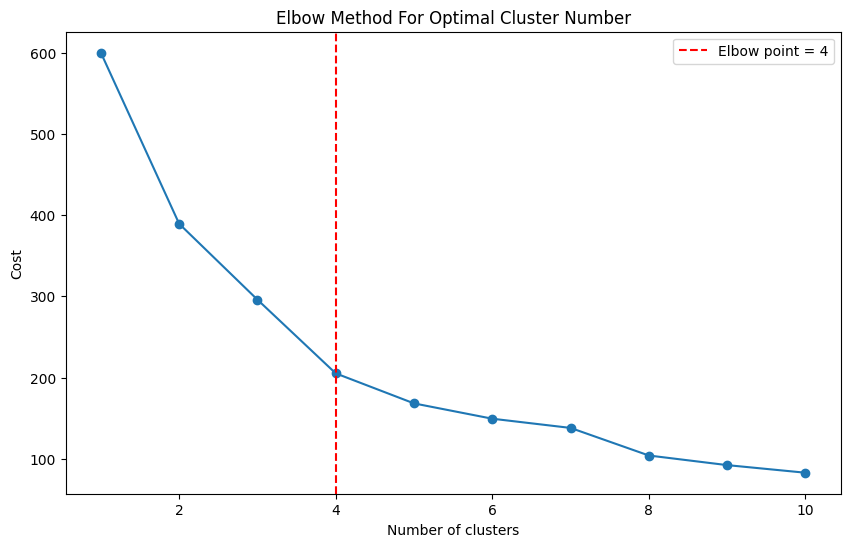

In [42]:
from sklearn.cluster import KMeans
from estyp.cluster import NClusterSearch


searcher = NClusterSearch(estimator=KMeans(), method='elbow')
searcher.fit(X_scaled)

labels = searcher.labels_
predicted_labels = searcher.predict(X_scaled)
optimal_model = searcher.best_estimator_
optimal_clusters = searcher.optimal_clusters_

searcher.plot()

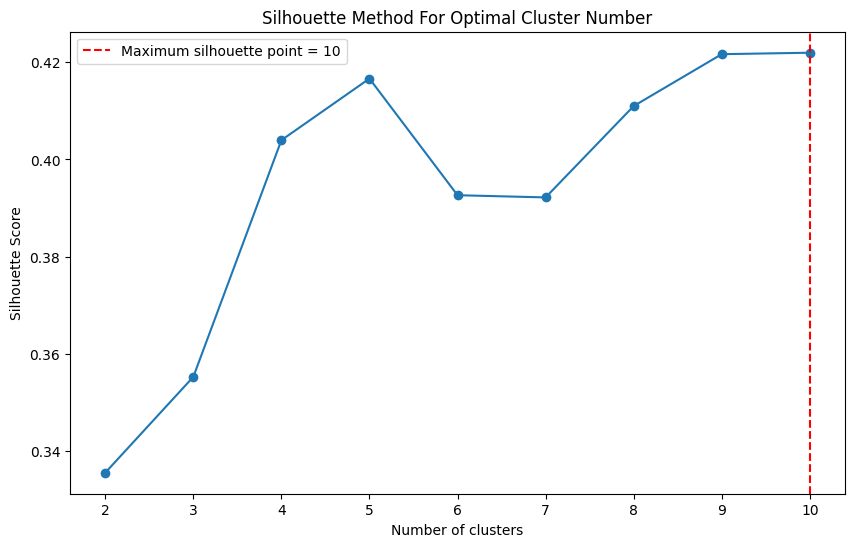

In [43]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from estyp.cluster import NClusterSearch

searcher = NClusterSearch(estimator=KMeans(), method='silhouette')
searcher.fit(X_scaled)

labels = searcher.labels_
predicted_labels = searcher.predict(X_scaled)
optimal_model = searcher.best_estimator_
optimal_clusters = searcher.optimal_clusters_

searcher.plot()

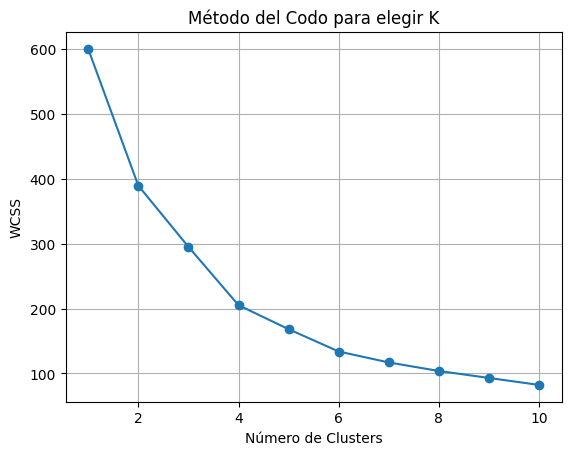

In [44]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("Método del Codo para elegir K")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

In [45]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

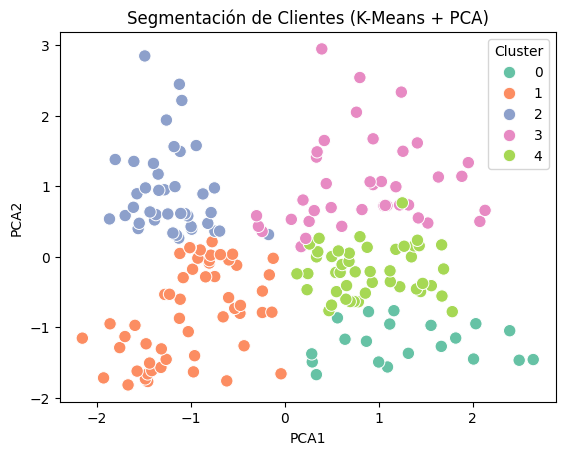

In [46]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df["PCA1"], df["PCA2"] = components[:, 0], components[:, 1]

sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="Set2", s=80)
plt.title("Segmentación de Clientes (K-Means + PCA)")
plt.show()

In [47]:
df.groupby("Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,46.250000,26.750000,18.350000
1,25.185185,41.092593,62.240741
2,32.875000,86.100000,81.525000
3,39.871795,86.102564,19.358974
4,55.638298,54.382979,48.851064


In [48]:
df.groupby("Cluster")["Age"].count()

,Age
Cluster,
0,20
1,54
2,40
3,39
4,47


In [49]:
df.groupby("Cluster")["CustomerID"]

---

## Parte 2: Actividades posteriores por grupos

Cada grupo debe elegir un nuevo dataset y aplicar K-Means o una técnica alternativa como DBSCAN o Agglomerative Clustering. Aquí algunos casos sugeridos:

---

### Ejercicio 1: Segmentación de vinos

- **Objetivo:** Agrupar distintos tipos de vino en función de sus características químicas.
- **Extensión:** Comparar resultados de K-Means con clustering jerárquico.

```python
from sklearn.datasets import load_wine
import pandas as pd

# Cargar datos
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)

# (Opcional) Ver etiquetas originales (clases)
df["target"] = data.target

df.head()
```

---

### Ejercicio 2: Agrupamiento de países por desarrollo humano

- **Objetivo:** Agrupar países según indicadores como educación, ingreso, esperanza de vida.
- **Extensión:** Analizar similitudes regionales y brechas globales.

```python
import pandas as pd

url = "https://raw.githubusercontent.com/bromero26/human-development-index/master/hdi_human_development_index.csv"
df = pd.read_csv(url)

# Seleccionar columnas más recientes (por ej. 'geo', '2015' o '2019')
df = df[['geo', '2015']].dropna()
df.head()
```

---

### Ejercicio 3: Agrupamiento de canciones por características musicales

- **Objetivo:** Agrupar canciones según tempo, energía, baileabilidad, etc.
- **Extensión:** Proponer una playlist personalizada para cada cluster.

```python
import pandas as pd

url = "https://raw.githubusercontent.com/gabminamedez/spotify-data/master/data.csv"
df = pd.read_csv(url)

# Seleccionar variables musicales relevantes
df = df[["danceability","energy","tempo","valence","loudness"]].dropna()

df.head()
```

---

### Ejercicio 4: Segmentación de estudiantes

- **Objetivo:** Agrupar estudiantes según hábitos de estudio, rendimiento y contexto social.
- **Extensión:** Proponer estrategias de apoyo personalizadas para cada grupo.

```python
import pandas as pd

url = "https://raw.githubusercontent.com/yogeshsachdeva223/Student_mat_exploration_and_visualisation/main/student-mat.csv"
df = pd.read_csv(url)

# Verificar estructura
df.head()
```

---

## Recomendaciones para grupos

1. **Analicen bien las variables:** ¿Cuáles son numéricas, cuáles deben codificarse?
2. **Visualicen sus clusters:** Con `PCA`, `t-SNE` o `Seaborn pairplot`.
3. **Interpreten los resultados:** ¿Qué patrones encontraron? ¿Qué caracteriza a cada grupo?
4. **Propongan acciones concretas:** Desde marketing a intervenciones educativas.


In [50]:
from sklearn.datasets import load_wine
import pandas as pd

# Cargar datos
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)

# (Opcional) Ver etiquetas originales (clases)
df["target"] = data.target

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [51]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

# Dataset de Segmentación de Vinos – Descripción de Variables

Este dataset contiene medidas químicas de distintos vinos cultivados en la región italiana de Piamonte. Las variables corresponden a concentraciones de distintos compuestos.

| Variable | Descripción |
|----------|-------------|
| `alcohol` | Porcentaje de alcohol en el vino. |
| `malic_acid` | Concentración de ácido málico (g/L), un ácido natural presente en muchas frutas. |
| `ash` | Contenido de cenizas del vino (g/L), relacionado con componentes minerales. |
| `alcalinity_of_ash` | Alcalinidad de la ceniza, una medida del contenido alcalino (básico) de los residuos minerales. |
| `magnesium` | Concentración de magnesio (mg/L), un mineral que afecta el sabor y la calidad del vino. |
| `total_phenols` | Cantidad total de compuestos fenólicos (mg/L), que influyen en el sabor, color y cuerpo del vino. |
| `flavanoids` | Subgrupo de los fenoles, compuestos con propiedades antioxidantes y gran influencia en el sabor. |
| `nonflavanoid_phenols` | Fenoles no flavonoides, también afectan el sabor y propiedades antioxidantes del vino. |
| `proanthocyanins` | Tipo de taninos, compuestos fenólicos que afectan la astringencia y el color del vino. |
| `color_intensity` | Intensidad del color del vino. |
| `hue` | Matiz del color, relación entre dos longitudes de onda de absorción (medida espectrofotométrica). |
| `od280/od315_of_diluted_wines` | Relación entre las absorbancias a 280 nm y 315 nm de un vino diluido, usada como medida de calidad. |
| `proline` | Aminoácido presente en el vino (mg/L), relacionado con el sabor y el envejecimiento. |
| `target` | Clase del vino (0, 1 o 2), es decir, la variedad de uva usada para producirlo. |

> Nota: Estas variables se usan frecuentemente en análisis de clustering (como K-Means) o clasificación supervisada.


In [52]:
import pandas as pd

url = "https://raw.githubusercontent.com/bromero26/human-development-index/master/hdi_human_development_index.csv"
df = pd.read_csv(url)


df.head()

,geo,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,0.295,0.300,0.309,0.305,0.300,0.324,0.328,0.332,0.335,...,0.415,0.433,0.434,0.448,0.454,0.463,0.470,0.476,0.479,0.479
1,Albania,0.635,0.618,0.603,0.608,0.616,0.628,0.637,0.636,0.646,...,0.703,0.713,0.721,0.725,0.738,0.752,0.759,0.761,0.762,0.764
2,Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.609,0.617,0.627,...,0.690,0.697,0.705,0.714,0.724,0.732,0.737,0.741,0.743,0.745
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.819,0.819,0.843,0.850,0.857,0.858
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.454,0.468,0.480,0.488,0.495,0.508,0.523,0.527,0.531,0.533


# Descripción de las columnas del dataset de Índice de Desarrollo Humano (IDH)

Este dataset contiene los valores históricos del **Índice de Desarrollo Humano (IDH)** por país, desde el año 1990 hasta 2015.

| Columna | Descripción |
|---------|-------------|
| `geo`   | Nombre del país o territorio. Es la única columna con valores de tipo texto (string). |
| `1990`, `1991`, ..., `2015` | Cada una de estas columnas representa el valor del IDH para ese año específico. Los valores están entre 0 y 1, donde: |
|         | - 1 indica el máximo desarrollo humano. |
|         | - 0 indica el mínimo desarrollo humano. |

## Ejemplo de fila

| geo        | 1990 | 1991 | 1992 | ... | 2015 |
|------------|------|------|------|-----|------|
| Afghanistan | 0.295 | 0.300 | 0.309 | ... | 0.479 |

Esto indica que el **IDH de Afganistán en 1990 fue de 0.295**, y en **2015 fue de 0.479**, lo cual representa una mejora significativa a lo largo de 25 años.

> 💡 El IDH es un indicador compuesto publicado por las Naciones Unidas, que mide:
> - **Esperanza de vida al nacer** (salud)
> - **Educación** (años promedio de escolaridad y años esperados de escolaridad)
> - **Ingreso nacional bruto per cápita** (nivel de vida)

## Valores faltantes

Algunos países tienen valores `NaN`, lo que significa que **no hay datos disponibles para esos años**. Esto es común en países muy pequeños, en conflicto, o donde no se recopilaron datos sistemáticamente.

``


In [53]:
import pandas as pd

url = "https://raw.githubusercontent.com/gabminamedez/spotify-data/master/data.csv"
df = pd.read_csv(url)

df.head()

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,6KbQ3uYMLKb5jDxLF7wYDD,Singende Bataillone 1. Teil,['Carl Woitschach'],158648,1928,1928,0.995,0.708,0.1950,0.563,0.1510,-12.428,0.0506,118.469,0.7790,1,10,0,0
1,6KuQTIu1KoTTkLXKrwlLPV,"Fantasiestücke, Op. 111: Più tosto lento","['Robert Schumann', 'Vladimir Horowitz']",282133,1928,1928,0.994,0.379,0.0135,0.901,0.0763,-28.454,0.0462,83.972,0.0767,1,8,0,0
2,6L63VW0PibdM1HDSBoqnoM,Chapter 1.18 - Zamek kaniowski,['Seweryn Goszczyński'],104300,1928,1928,0.604,0.749,0.2200,0.000,0.1190,-19.924,0.9290,107.177,0.8800,0,5,0,0
3,6M94FkXd15sOAOQYRnWPN8,Bebamos Juntos - Instrumental (Remasterizado),['Francisco Canaro'],180760,9/25/28,1928,0.995,0.781,0.1300,0.887,0.1110,-14.734,0.0926,108.003,0.7200,0,1,0,0
4,6N6tiFZ9vLTSOIxkj8qKrd,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', 'Vladimir Horowitz']",687733,1928,1928,0.990,0.210,0.2040,0.908,0.0980,-16.829,0.0424,62.149,0.0693,1,11,1,0


# Descripción de las columnas del dataset de Spotify

Este dataset contiene metadatos y características de audio de canciones provenientes de Spotify. A continuación se describen las columnas incluidas:

| Columna | Descripción |
|---------|-------------|
| `id` | Identificador único de la canción en Spotify. |
| `name` | Nombre o título de la canción. |
| `artists` | Lista de artistas que interpretan la canción. |
| `duration_ms` | Duración de la canción en milisegundos. |
| `release_date` | Fecha de lanzamiento de la canción (puede tener solo el año o la fecha completa). |
| `year` | Año de lanzamiento (extraído de `release_date`). |
| `acousticness` | Nivel de acústica de la canción. Valor entre 0.0 y 1.0, donde valores cercanos a 1.0 indican alta probabilidad de ser acústica. |
| `danceability` | Nivel de "bailabilidad" de la canción, basado en tempo, ritmo y estabilidad. Rango de 0.0 a 1.0. |
| `energy` | Medida de intensidad y actividad percibida. Valores altos implican canciones rápidas, ruidosas y potentes. Rango: 0.0 a 1.0. |
| `instrumentalness` | Estima la probabilidad de que una canción no contenga voces. Un valor cercano a 1.0 sugiere que es instrumental. |
| `liveness` | Probabilidad de que la canción haya sido grabada en vivo. Valores más altos indican una mayor presencia de audiencia. |
| `loudness` | Volumen general de la pista en decibelios (dB). Cuanto más negativo el número, más suave es la canción. |
| `speechiness` | Indica la presencia de palabras habladas en la canción. Valores altos se asocian con rap, podcasts, etc. |
| `tempo` | Tempo estimado de la canción en pulsaciones por minuto (BPM). |
| `valence` | Describe la positividad musical de una canción. Valores cercanos a 1.0 indican emociones más alegres y positivas. |
| `mode` | Modalidad de la canción: 1 para mayor (sonido más alegre), 0 para menor (sonido más triste). |
| `key` | Tono musical de la canción representado como un número entero (0 = Do, 1 = Do#, ..., 11 = Si). |
| `popularity` | Popularidad de la canción en Spotify (escala de 0 a 100). |
| `explicit` | Indica si la canción contiene lenguaje explícito: 1 = sí, 0 = no. |

> 🎵 Este tipo de datos es ideal para análisis musical, clustering, recomendaciones, visualizaciones y estudios de tendencias sonoras.


In [54]:
import pandas as pd

url = "https://raw.githubusercontent.com/yogeshsachdeva223/Student_mat_exploration_and_visualisation/main/student-mat.csv"
df = pd.read_csv(url)

# Verificar estructura
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Descripción de las columnas del dataset `student-mat.csv`

Este dataset contiene información socioeconómica, escolar y personal de estudiantes, junto con sus notas finales. Las variables ayudan a explorar cómo distintos factores pueden afectar el rendimiento académico.

## Variables demográficas y familiares

| Columna | Descripción |
|---------|-------------|
| `school` | Escuela del estudiante: `GP` = Gabriel Pereira, `MS` = Mousinho da Silveira. |
| `sex` | Sexo del estudiante: `F` = femenino, `M` = masculino. |
| `age` | Edad del estudiante (en años). |
| `address` | Tipo de domicilio: `U` = urbano, `R` = rural. |
| `famsize` | Tamaño de la familia: `LE3` = 3 o menos miembros, `GT3` = más de 3 miembros. |
| `Pstatus` | Estado civil de los padres: `T` = viven juntos, `A` = separados. |
| `Medu` | Nivel educativo de la madre (0: ninguno, 1: educación básica, 2: secundaria, 3: preparatoria, 4: superior). |
| `Fedu` | Nivel educativo del padre (escala igual a `Medu`). |
| `Mjob` | Trabajo de la madre (por ejemplo: `teacher`, `health`, `services`, `at_home`, `other`). |
| `Fjob` | Trabajo del padre (categorías similares a `Mjob`). |

## Apoyo escolar y social

| Columna | Descripción |
|---------|-------------|
| `reason` | Razón principal para elegir esta escuela (`home`, `reputation`, `course`, `other`). |
| `guardian` | Tutor legal: `mother`, `father`, u `other`. |
| `traveltime` | Tiempo de viaje a la escuela (1: <15 min, 2: 15–30 min, 3: 30–60 min, 4: >1 hora). |
| `studytime` | Tiempo semanal de estudio (1: <2 horas, 2: 2–5 horas, 3: 5–10 horas, 4: >10 horas). |
| `failures` | Número de cursos reprobados anteriormente (0–3+). |
| `schoolsup` | Apoyo escolar extra (clases particulares): `yes` o `no`. |
| `famsup` | Apoyo educativo de la familia: `yes` o `no`. |
| `paid` | Clases pagadas extracurriculares (por ejemplo, refuerzo): `yes` o `no`. |
| `activities` | Participación en actividades extracurriculares: `yes` o `no`. |
| `nursery` | Asistencia a jardín infantil: `yes` o `no`. |
| `higher` | Desea realizar estudios superiores: `yes` o `no`. |
| `internet` | Acceso a internet en casa: `yes` o `no`. |
| `romantic` | Está en una relación romántica: `yes` o `no`. |

## Bienestar personal y entorno

| Columna | Descripción |
|---------|-------------|
| `famrel` | Calidad de la relación familiar (1: muy mala a 5: excelente). |
| `freetime` | Tiempo libre después de clases (1: muy poco a 5: mucho). |
| `goout` | Frecuencia de salidas con amigos (1: nunca a 5: siempre). |
| `Dalc` | Consumo de alcohol entre semana (1: muy bajo a 5: muy alto). |
| `Walc` | Consumo de alcohol durante el fin de semana (1: muy bajo a 5: muy alto). |
| `health` | Estado de salud actual (1: muy malo a 5: muy bueno). |
| `absences` | Número de ausencias escolares. |

## Notas académicas

| Columna | Descripción |
|---------|-------------|
| `G1` | Nota en la primera evaluación (escala de 0 a 20). |
| `G2` | Nota en la segunda evaluación (escala de 0 a 20). |
| `G3` | Nota final (escala de 0 a 20). Esta es la **variable objetivo** en tareas de predicción de rendimiento académico. |

---

> 🎓 Este dataset es ideal para analizar factores que influyen en el rendimiento escolar, explorar correlaciones y construir modelos de predicción (por ejemplo, regresión, árboles de decisión, etc.).


### GRUPO 1
Alicia, Felipe y Sebastián
> Análisis de vinos


### Grupo 2
Ariel, Franco y Hugo
> Canciones de Spotify

### GRUPO 3
Eduardo, Kiara y Leandro
> Estudiantes

# Sistemas de recomendación

https://surpriselib.com/

In [3]:
!pip install "numpy<2.0.0" --force-reinstall

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [4]:
# Ver version numpy cargada
import numpy as np
print(np.__version__)

1.26.4


In [5]:
!pip install scikit-surprise

In [6]:
from surprise import SVD


In [7]:
from surprise import Dataset


In [8]:
# Load the movielens-100k dataset (download it if needed).
data = Dataset.load_builtin('ml-100k')

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


In [9]:
data

In [10]:
from surprise.model_selection import cross_validate

# Use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results.
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9308  0.9379  0.9379  0.9361  0.9332  0.9352  0.0028  
MAE (testset)     0.7320  0.7413  0.7387  0.7390  0.7354  0.7373  0.0032  
Fit time          1.58    1.31    1.31    1.30    1.30    1.36    0.11    
Test time         0.19    0.22    0.10    0.20    0.10    0.16    0.05    


{'test_rmse': array([0.93078142, 0.93790316, 0.93790219, 0.93612232, 0.93322479]),
 'test_mae': array([0.73197493, 0.74128433, 0.738706  , 0.73902917, 0.73539863]),
 'fit_time': (1.578524112701416,
  1.3133320808410645,
  1.3083000183105469,
  1.2992424964904785,
  1.3026604652404785),
 'test_time': (0.18709278106689453,
  0.22279763221740723,
  0.0997931957244873,
  0.19796061515808105,
  0.10100555419921875)}

In [11]:

import os
import zipfile
import requests
import pandas as pd
from surprise import Dataset, Reader

# URL del dataset
url = "https://files.grouplens.org/datasets/hetrec2011/hetrec2011-lastfm-2k.zip"
zip_file = "hetrec2011-lastfm-2k.zip"
extract_dir = "hetrec2011-lastfm-2k"

# Descargar el dataset
if not os.path.exists(zip_file):
    print("Descargando dataset...")
    response = requests.get(url)
    with open(zip_file, 'wb') as f:
        f.write(response.content)
    print("Descarga completa.")

# Descomprimir el dataset
if not os.path.exists(extract_dir):
    print("Descomprimiendo dataset...")
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print("Descompresión completa.")

Descargando dataset...
Descarga completa.
Descomprimiendo dataset...
Descompresión completa.


In [12]:
# user_artists.dat - Relación entre usuarios y artistas
user_artists_path = os.path.join(extract_dir, 'user_artists.dat')
df_user_artists = pd.read_csv(user_artists_path, sep='\t')
print("Datos de user_artists:")
print(df_user_artists.head())

# artists.dat - Información sobre los artistas
artists_path = os.path.join(extract_dir, 'artists.dat')
df_artists = pd.read_csv(artists_path, sep='\t')
print("Datos de artists:")
print(df_artists.head())

# tags.dat - Información sobre las etiquetas
# Cargar el archivo tags.dat usando una codificación alternativa
tags_path = os.path.join(extract_dir, 'tags.dat')
try:
    df_tags = pd.read_csv(tags_path, sep='\t', encoding='latin1')  # Cambiar la codificación a latin1
    print("Datos de tags:")
    print(df_tags.head())
except UnicodeDecodeError as e:
    print(f"Error de decodificación: {e}")


# user_friends.dat - Relación de amistad entre usuarios
user_friends_path = os.path.join(extract_dir, 'user_friends.dat')
df_user_friends = pd.read_csv(user_friends_path, sep='\t')
print("Datos de user_friends:")
print(df_user_friends.head())

# user_taggedartists-timestamps.dat - Etiquetas de los usuarios a los artistas con marcas de tiempo
user_taggedartists_timestamps_path = os.path.join(extract_dir, 'user_taggedartists-timestamps.dat')
df_user_taggedartists_timestamps = pd.read_csv(user_taggedartists_timestamps_path, sep='\t')
print("Datos de user_taggedartists_timestamps:")
print(df_user_taggedartists_timestamps.head())

# user_taggedartists.dat - Etiquetas de los usuarios a los artistas
user_taggedartists_path = os.path.join(extract_dir, 'user_taggedartists.dat')
df_user_taggedartists = pd.read_csv(user_taggedartists_path, sep='\t')
print("Datos de user_taggedartists:")
print(df_user_taggedartists.head())

# Preparar los datos para Surprise (usaremos user_artists.dat para recomendaciones)

reader = Reader(rating_scale=(df_user_artists['weight'].min(), df_user_artists['weight'].max()))
data = Dataset.load_from_df(df_user_artists[['userID', 'artistID', 'weight']], reader)

Datos de user_artists:
   userID  artistID  weight
0       2        51   13883
1       2        52   11690
2       2        53   11351
3       2        54   10300
4       2        55    8983
Datos de artists:
   id               name                                         url  \
0   1       MALICE MIZER       http://www.last.fm/music/MALICE+MIZER   
1   2    Diary of Dreams    http://www.last.fm/music/Diary+of+Dreams   
2   3  Carpathian Forest  http://www.last.fm/music/Carpathian+Forest   
3   4       Moi dix Mois       http://www.last.fm/music/Moi+dix+Mois   
4   5        Bella Morte        http://www.last.fm/music/Bella+Morte   

                                          pictureURL  
0    http://userserve-ak.last.fm/serve/252/10808.jpg  
1  http://userserve-ak.last.fm/serve/252/3052066.jpg  
2  http://userserve-ak.last.fm/serve/252/40222717...  
3  http://userserve-ak.last.fm/serve/252/54697835...  
4  http://userserve-ak.last.fm/serve/252/14789013...  
Datos de tags:
   tagID     

In [13]:
from surprise import SVD, KNNBasic
from surprise.model_selection import train_test_split, cross_validate

# Crear un set de entrenamiento y prueba
trainset, testset = train_test_split(data, test_size=0.25)

# Usar SVD para el modelo de recomendación
algo = SVD()

# Entrenar el modelo
algo.fit(trainset)

# Evaluar el modelo
predictions = algo.test(testset)


In [14]:
from surprise import Dataset, Reader, SVD, KNNBasic
from surprise.model_selection import train_test_split, cross_validate

# Preparación de los datos para Surprise
reader = Reader(rating_scale=(df_user_artists['weight'].min(), df_user_artists['weight'].max()))
data = Dataset.load_from_df(df_user_artists[['userID', 'artistID', 'weight']], reader)

# Dividir el conjunto de datos en entrenamiento y prueba
trainset, testset = train_test_split(data, test_size=0.25)

# Usar el algoritmo SVD para crear el modelo de recomendación
modelo_svd = SVD()

# Entrenar el modelo SVD
modelo_svd.fit(trainset)

# Evaluar el modelo SVD
predictions_svd = modelo_svd.test(testset)

# Mostrar algunas predicciones SVD
print("\nAlgunas predicciones SVD:")
for prediction in predictions_svd[:5]:
    print(prediction)

# Usar el algoritmo KNNBasic para crear el modelo de recomendación
modelo_knn = KNNBasic()

# Entrenar el modelo KNNBasic
modelo_knn.fit(trainset)

# Evaluar el modelo KNNBasic
predictions_knn = modelo_knn.test(testset)

# Mostrar algunas predicciones KNNBasic
print("\nAlgunas predicciones KNNBasic:")
for prediction in predictions_knn[:5]:
    print(prediction)

# Evaluar el rendimiento de ambos modelos usando validación cruzada
print("\nEvaluación usando validación cruzada:")
cross_validate(modelo_svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
cross_validate(modelo_knn, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Algunas predicciones SVD:
user: 1179       item: 12966      r_ui = 129.00   est = 352698.00   {'was_impossible': False}
user: 181        item: 3832       r_ui = 149.00   est = 352698.00   {'was_impossible': False}
user: 80         item: 779        r_ui = 245.00   est = 352698.00   {'was_impossible': False}
user: 1343       item: 173        r_ui = 15.00   est = 352698.00   {'was_impossible': False}
user: 878        item: 1021       r_ui = 22.00   est = 352698.00   {'was_impossible': False}
Computing the msd similarity matrix...
Done computing similarity matrix.

Algunas predicciones KNNBasic:
user: 1179       item: 12966      r_ui = 129.00   est = 736.52   {'was_impossible': True, 'reason': 'Not enough neighbors.'}
user: 181        item: 3832       r_ui = 149.00   est = 84.62   {'actual_k': 5, 'was_impossible': False}
user: 80         item: 779        r_ui = 245.00   est = 157.68   {'actual_k': 38, 'was_impossible': False}
user: 1343       item: 173        r_ui = 15.00   est = 147.63  

{'test_rmse': array([4066.53431363, 5016.93411922, 3275.20404144, 4923.6591541 ,
        4910.83670812]),
 'test_mae': array([788.691091  , 773.6138824 , 742.58486305, 793.34694403,
        802.47599268]),
 'fit_time': (0.34519290924072266,
  0.36569952964782715,
  0.3568084239959717,
  0.45132017135620117,
  0.335357666015625),
 'test_time': (1.4771621227264404,
  1.48203706741333,
  1.5651278495788574,
  2.070073366165161,
  2.7988016605377197)}

In [16]:
# Realizar una predicción para un usuario específico y un artista específico usando el modelo SVD
user_id = 3  # ID del usuario
artist_id = 51  # ID del artista

# Hacer la predicción con el modelo SVD
pred_svd = modelo_svd.predict(user_id, artist_id)
print(f"Predicción SVD para el usuario {user_id} y el artista {artist_id}: {pred_svd.est}")

# Hacer la predicción con el modelo KNNBasic
pred_knn = modelo_knn.predict(user_id, artist_id)
print(f"Predicción KNNBasic para el usuario {user_id} y el artista {artist_id}: {pred_knn.est}")

Predicción SVD para el usuario 3 y el artista 51: 352698
Predicción KNNBasic para el usuario 3 y el artista 51: 738.1837399687618


In [17]:
import random
from IPython.display import Javascript, display
from google.colab.output import eval_js
import pandas as pd
import numpy as np
from surprise import Dataset, Reader, SVD

# Normalizar 'weight' a una escala de 1 a 5
min_weight = df_user_artists['weight'].min()
max_weight = df_user_artists['weight'].max()

df_user_artists['rating'] = 1 + 4 * (df_user_artists['weight'] - min_weight) / (max_weight - min_weight)

# Convertir el DataFrame en el formato esperado por Surprise
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_user_artists[['userID', 'artistID', 'rating']], reader)

# Entrenar el modelo con Surprise
trainset = data.build_full_trainset()
modelo_svd = SVD()
modelo_svd.fit(trainset)

# Función para obtener recomendaciones basadas en predicciones
def get_top_artists_for_user(user_id, last_liked_artist_id=None, n=5):
    # Obtener todos los artistas que el usuario no ha escuchado
    unheard_artists = set(df_artists['id']) - set(df_user_artists[df_user_artists['userID'] == user_id]['artistID'])

    # Predecir ratings para estos artistas usando el modelo de Surprise
    predictions = [(artist_id, modelo_svd.predict(user_id, artist_id).est) for artist_id in unheard_artists]

    # Si hay un artista que le gustó, filtrar por similitud
    if last_liked_artist_id is not None:
        # Filtrar los artistas que tengan un score más cercano al último artista que le gustó
        similar_artists = [(artist_id, score) for artist_id, score in predictions if abs(score - modelo_svd.predict(user_id, last_liked_artist_id).est) < 0.1]
        predictions = similar_artists if similar_artists else predictions  # Si no hay similares, usar todos

    # Ordenar por rating predicho y devolver los top n
    return sorted(predictions, key=lambda x: x[1], reverse=True)[:n]

# Inicializar lista de artistas recomendados para un usuario aleatorio
def inicializar_recomendaciones():
    global user_id, recommended_artists, current_index, last_liked_artist_id
    user_id = random.choice(df_user_artists['userID'].unique())  # Seleccionar un usuario al azar
    recommended_artists = get_top_artists_for_user(user_id)
    current_index = 0
    last_liked_artist_id = None  # Reiniciar el último artista que le gustó

inicializar_recomendaciones()  # Generar la primera recomendación

liked_artists = []  # Lista para almacenar artistas que le gustan
like_count = 0  # Contador de "me gusta"

def create_buttons(artist_name):
    artist_name_escaped = artist_name.replace("'", "\'").replace('"', '\"')  # Escapar caracteres
    display(Javascript(f'''
        var div = document.createElement('div');
        var btn1 = document.createElement('button');
        btn1.innerHTML = 'Me gusta: {artist_name_escaped}';
        btn1.onclick = function() {{
          google.colab.kernel.invokeFunction('notebook.callback', ['Me gusta', '{artist_name_escaped}'], {{}});
        }};

        var btn2 = document.createElement('button');
        btn2.innerHTML = 'No me gusta: {artist_name_escaped}';
        btn2.onclick = function() {{
          google.colab.kernel.invokeFunction('notebook.callback', ['No me gusta', '{artist_name_escaped}'], {{}});
        }};

        div.appendChild(btn1);
        div.appendChild(btn2);
        document.body.appendChild(div);
    '''))

def handle_choice(choice, artist_name):
    global user_id, recommended_artists, current_index, last_liked_artist_id, liked_artists, like_count

    print(f'Has elegido: {choice} para {artist_name}')

    if choice == 'Me gusta':
        last_liked_artist_id = df_artists[df_artists['name'] == artist_name]['id'].values[0]  # Guardar el último artista que le gustó
        liked_artists.append(artist_name)  # Agregar el artista a la lista de artistas que le gustan
        like_count += 1  # Incrementar el contador de "me gusta"

        # Verificar si ha alcanzado 6 "me gusta"
        if like_count >= 6:
            print("Te gustan los siguientes artistas:")
            for artist in liked_artists:
                print(artist)
            return  # Termina el programa

        current_index += 1
        if current_index < len(recommended_artists):
            next_artist_id, next_score = recommended_artists[current_index]
            next_artist_name = df_artists[df_artists['id'] == next_artist_id]['name'].values[0]
            print(f"Artista recomendado: {next_artist_name}, score: {next_score}")
            create_buttons(next_artist_name)
        else:
            print("No hay más artistas en la lista de recomendaciones. Seleccionando un nuevo usuario.")
            inicializar_recomendaciones()
            next_artist_id, next_score = recommended_artists[current_index]
            next_artist_name = df_artists[df_artists['id'] == next_artist_id]['name'].values[0]
            print(f"Nuevo usuario seleccionado. Artista recomendado: {next_artist_name}, score: {next_score}")
            create_buttons(next_artist_name)
    else:
        # Seleccionar un nuevo artista si elige 'No me gusta'
        unheard_artists = set(df_artists['id']) - set(df_user_artists[df_user_artists['userID'] == user_id]['artistID'])
        next_artist_id = random.choice(list(unheard_artists))
        next_artist_name = df_artists[df_artists['id'] == next_artist_id]['name'].values[0]
        next_score = modelo_svd.predict(user_id, next_artist_id).est
        print(f"Nuevo artista recomendado: {next_artist_name}, score: {next_score}")
        create_buttons(next_artist_name)

# Registrar la función en Google Colab
from google.colab import output
output.register_callback('notebook.callback', handle_choice)

# Mostrar el primer artista recomendado
first_artist_id, first_score = recommended_artists[current_index]
first_artist_name = df_artists[df_artists['id'] == first_artist_id]['name'].values[0]
print(f"Artista recomendado: {first_artist_name}, score: {first_score}")
create_buttons(first_artist_name)

Artista recomendado: Ambra Red, score: 1.4526515435486886


<IPython.core.display.Javascript object>

Has elegido: No me gusta para Ambra Red
Nuevo artista recomendado: Trumans Water, score: 1.1890069690332556


<IPython.core.display.Javascript object>

Has elegido: No me gusta para Trumans Water
Nuevo artista recomendado: 斉藤和義, score: 1.013418013849768


<IPython.core.display.Javascript object>

Has elegido: No me gusta para 斉藤和義
Nuevo artista recomendado: Ricardo Gravações, score: 1


<IPython.core.display.Javascript object>

Has elegido: No me gusta para Ricardo Gravações
Nuevo artista recomendado: To/Die/For, score: 1


<IPython.core.display.Javascript object>

Has elegido: No me gusta para To/Die/For
Nuevo artista recomendado: The Cover Girls, score: 1


<IPython.core.display.Javascript object>

Has elegido: Me gusta para The Cover Girls
Artista recomendado: Keny Arkana, score: 1.3907994105824795


<IPython.core.display.Javascript object>

Has elegido: Me gusta para Keny Arkana
Artista recomendado: VFSix, score: 1.3658303385079105


<IPython.core.display.Javascript object>

Has elegido: Me gusta para VFSix
Artista recomendado: Eleventyseven, score: 1.3615670783315645


<IPython.core.display.Javascript object>

Has elegido: Me gusta para Eleventyseven
Artista recomendado: Belén Arjona, score: 1.3401018047839108


<IPython.core.display.Javascript object>

Has elegido: Me gusta para Belén Arjona
No hay más artistas en la lista de recomendaciones. Seleccionando un nuevo usuario.
Nuevo usuario seleccionado. Artista recomendado: the peabodys, score: 1.3262684935862603


<IPython.core.display.Javascript object>

In [18]:
import random
from IPython.display import Javascript, display, HTML
from google.colab.output import eval_js
import pandas as pd
import numpy as np
from surprise import Dataset, Reader, SVD

# Normalizar 'weight' a una escala de 1 a 5
min_weight = df_user_artists['weight'].min()
max_weight = df_user_artists['weight'].max()

df_user_artists['rating'] = 1 + 4 * (df_user_artists['weight'] - min_weight) / (max_weight - min_weight)

# Convertir el DataFrame en el formato esperado por Surprise
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_user_artists[['userID', 'artistID', 'rating']], reader)

# Entrenar el modelo con Surprise
trainset = data.build_full_trainset()
modelo_svd = SVD()
modelo_svd.fit(trainset)

# Función para obtener recomendaciones basadas en predicciones
def get_top_artists_for_user(user_id, last_liked_artist_id=None, n=5):
    # Obtener todos los artistas que el usuario no ha escuchado
    unheard_artists = set(df_artists['id']) - set(df_user_artists[df_user_artists['userID'] == user_id]['artistID'])

    # Predecir ratings para estos artistas usando el modelo de Surprise
    predictions = [(artist_id, modelo_svd.predict(user_id, artist_id).est) for artist_id in unheard_artists]

    # Si hay un artista que le gustó, filtrar por similitud
    if last_liked_artist_id is not None:
        # Filtrar los artistas que tengan un score más cercano al último artista que le gustó
        similar_artists = [(artist_id, score) for artist_id, score in predictions if abs(score - modelo_svd.predict(user_id, last_liked_artist_id).est) < 0.1]
        predictions = similar_artists if similar_artists else predictions  # Si no hay similares, usar todos

    # Ordenar por rating predicho y devolver los top n
    return sorted(predictions, key=lambda x: x[1], reverse=True)[:n]

# Inicializar lista de artistas recomendados para un usuario aleatorio
def inicializar_recomendaciones():
    global user_id, recommended_artists, current_index, last_liked_artist_id
    user_id = random.choice(df_user_artists['userID'].unique())  # Seleccionar un usuario al azar
    recommended_artists = get_top_artists_for_user(user_id)
    current_index = 0
    last_liked_artist_id = None  # Reiniciar el último artista que le gustó

inicializar_recomendaciones()  # Generar la primera recomendación

liked_artists = []  # Lista para almacenar artistas que le gustan
like_count = 0  # Contador de "me gusta"

def create_buttons(artist_name):
    artist_name_escaped = artist_name.replace("'", "\'").replace('"', '\"')  # Escapar caracteres
    display(Javascript(f'''
        var div = document.createElement('div');
        var btn1 = document.createElement('button');
        btn1.innerHTML = 'Me gusta: {artist_name_escaped}';
        btn1.onclick = function() {{
          google.colab.kernel.invokeFunction('notebook.callback', ['Me gusta', '{artist_name_escaped}'], {{}});
        }};

        var btn2 = document.createElement('button');
        btn2.innerHTML = 'No me gusta: {artist_name_escaped}';
        btn2.onclick = function() {{
          google.colab.kernel.invokeFunction('notebook.callback', ['No me gusta', '{artist_name_escaped}'], {{}});
        }};

        div.appendChild(btn1);
        div.appendChild(btn2);
        document.body.appendChild(div);
    '''))

def handle_choice(choice, artist_name):
    global user_id, recommended_artists, current_index, last_liked_artist_id, liked_artists, like_count

    print(f'Has elegido: {choice} para {artist_name}')

    if choice == 'Me gusta':
        last_liked_artist_id = df_artists[df_artists['name'] == artist_name]['id'].values[0]  # Guardar el último artista que le gustó
        liked_artists.append(artist_name)  # Agregar el artista a la lista de artistas que le gustan
        like_count += 1  # Incrementar el contador de "me gusta"

        # Verificar si ha alcanzado 6 "me gusta"
        if like_count >= 6:
            # Mostrar mensaje final en rojo
            final_message = "Te gustan los siguientes artistas:"
            final_message += ''.join(f"{artist}" for artist in liked_artists)
            final_message += ""
            display(HTML(final_message))
            return  # Termina el programa

        current_index += 1
        if current_index < len(recommended_artists):
            next_artist_id, next_score = recommended_artists[current_index]
            next_artist_name = df_artists[df_artists['id'] == next_artist_id]['name'].values[0]
            print(f"Artista recomendado: {next_artist_name}, score: {next_score}")
            create_buttons(next_artist_name)
        else:
            print("No hay más artistas en la lista de recomendaciones. Seleccionando un nuevo usuario.")
            inicializar_recomendaciones()
            next_artist_id, next_score = recommended_artists[current_index]
            next_artist_name = df_artists[df_artists['id'] == next_artist_id]['name'].values[0]
            print(f"Nuevo usuario seleccionado. Artista recomendado: {next_artist_name}, score: {next_score}")
            create_buttons(next_artist_name)
    else:
        # Seleccionar un nuevo artista si elige 'No me gusta'
        unheard_artists = set(df_artists['id']) - set(df_user_artists[df_user_artists['userID'] == user_id]['artistID'])
        next_artist_id = random.choice(list(unheard_artists))
        next_artist_name = df_artists[df_artists['id'] == next_artist_id]['name'].values[0]
        next_score = modelo_svd.predict(user_id, next_artist_id).est
        print(f"Nuevo artista recomendado: {next_artist_name}, score: {next_score}")
        create_buttons(next_artist_name)

# Registrar la función en Google Colab
from google.colab import output
output.register_callback('notebook.callback', handle_choice)

# Mostrar el primer artista recomendado
first_artist_id, first_score = recommended_artists[current_index]
first_artist_name = df_artists[df_artists['id'] == first_artist_id]['name'].values[0]
print(f"Artista recomendado: {first_artist_name}, score: {first_score}")
create_buttons(first_artist_name)


Artista recomendado: deadmau5, score: 1.3722849464481703


<IPython.core.display.Javascript object>

Has elegido: Me gusta para deadmau5
Artista recomendado: Maria Mena, score: 1.35359118102659


<IPython.core.display.Javascript object>

Has elegido: No me gusta para Maria Mena
Nuevo artista recomendado: Halina Benedyk, score: 1


<IPython.core.display.Javascript object>

Has elegido: No me gusta para Halina Benedyk
Nuevo artista recomendado: Juan Gabriel, score: 1.2194587363914344


<IPython.core.display.Javascript object>

Has elegido: Me gusta para Juan Gabriel
Artista recomendado: Kazım Koyuncu, score: 1.3235581608339322


<IPython.core.display.Javascript object>

Has elegido: No me gusta para Kazım Koyuncu
Nuevo artista recomendado: Sleetgrout, score: 1.0812958059669633


<IPython.core.display.Javascript object>

Has elegido: Me gusta para Sleetgrout
Artista recomendado: BigBang, score: 1.3171342973888656


<IPython.core.display.Javascript object>

Has elegido: Me gusta para BigBang
Artista recomendado: Superbus, score: 1.2832468281640825


<IPython.core.display.Javascript object>

Has elegido: Me gusta para Superbus
No hay más artistas en la lista de recomendaciones. Seleccionando un nuevo usuario.
Nuevo usuario seleccionado. Artista recomendado: Nappy Roots, score: 1.4222385591683604


<IPython.core.display.Javascript object>

Has elegido: Me gusta para Nappy Roots


In [19]:
# Crear nuevo df merge df_artists (id) y df_user_taggedartists (artistID)
new_artists_user_taggedartists = pd.merge(df_artists, df_user_taggedartists, left_on='id', right_on='artistID')

# Eliminar variables no útiles para el programa
new_artists_user_taggedartists = new_artists_user_taggedartists.drop(columns=['id', 'pictureURL', 'userID', 'day', 'month', 'year'])

# Eliminar en new_artists_user_taggedartists los artistID repetidos
new_artists_user_taggedartists = new_artists_user_taggedartists.drop_duplicates(subset=['artistID'])

# merge new_artists_user_taggedartists (artistID) con df_tags (tagValue)
new_artists_user_taggedartists = pd.merge(new_artists_user_taggedartists, df_tags, left_on='tagID', right_on='tagID')


In [20]:
import random
from IPython.display import Javascript, display, HTML
from google.colab.output import eval_js
import pandas as pd
import numpy as np
from surprise import Dataset, Reader, SVD

# Asumimos que df_user_artists, df_artists y new_artists_user_taggedartists ya están cargados

# Normalizar 'weight' a una escala de 1 a 5
min_weight = df_user_artists['weight'].min()
max_weight = df_user_artists['weight'].max()

df_user_artists['rating'] = 1 + 4 * (df_user_artists['weight'] - min_weight) / (max_weight - min_weight)

# Convertir el DataFrame en el formato esperado por Surprise
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_user_artists[['userID', 'artistID', 'rating']], reader)

# Entrenar el modelo con Surprise
trainset = data.build_full_trainset()
modelo_svd = SVD()
modelo_svd.fit(trainset)

# Función para obtener recomendaciones basadas en predicciones
def get_top_artists_for_user(user_id, last_liked_artist_id=None, n=5):
    # Obtener todos los artistas que el usuario no ha escuchado
    unheard_artists = set(df_artists['id']) - set(df_user_artists[df_user_artists['userID'] == user_id]['artistID'])

    # Predecir ratings para estos artistas usando el modelo de Surprise
    predictions = [(artist_id, modelo_svd.predict(user_id, artist_id).est) for artist_id in unheard_artists]

    # Si hay un artista que le gustó, filtrar por similitud
    if last_liked_artist_id is not None:
        # Filtrar los artistas que tengan un score más cercano al último artista que le gustó
        similar_artists = [(artist_id, score) for artist_id, score in predictions if abs(score - modelo_svd.predict(user_id, last_liked_artist_id).est) < 0.1]
        predictions = similar_artists if similar_artists else predictions  # Si no hay similares, usar todos

    # Ordenar por rating predicho y devolver los top n
    return sorted(predictions, key=lambda x: x[1], reverse=True)[:n]

# Inicializar lista de artistas recomendados para un usuario aleatorio
def inicializar_recomendaciones():
    global user_id, recommended_artists, current_index, last_liked_artist_id
    user_id = random.choice(df_user_artists['userID'].unique())  # Seleccionar un usuario al azar
    recommended_artists = get_top_artists_for_user(user_id)
    current_index = 0
    last_liked_artist_id = None  # Reiniciar el último artista que le gustó

inicializar_recomendaciones()  # Generar la primera recomendación

liked_artists = []  # Lista para almacenar artistas que le gustan
like_count = 0  # Contador de "me gusta"

def create_buttons(artist_name):
    artist_name_escaped = artist_name.replace("'", "\'").replace('"', '\"')  # Escapar caracteres
    display(Javascript(f'''
        var div = document.createElement('div');
        var btn1 = document.createElement('button');
        btn1.innerHTML = 'Me gusta: {artist_name_escaped}';
        btn1.onclick = function() {{
          google.colab.kernel.invokeFunction('notebook.callback', ['Me gusta', '{artist_name_escaped}'], {{}});
        }};

        var btn2 = document.createElement('button');
        btn2.innerHTML = 'No me gusta: {artist_name_escaped}';
        btn2.onclick = function() {{
          google.colab.kernel.invokeFunction('notebook.callback', ['No me gusta', '{artist_name_escaped}'], {{}});
        }};

        div.appendChild(btn1);
        div.appendChild(btn2);
        document.body.appendChild(div);
    '''))

def handle_choice(choice, artist_name):
    global user_id, recommended_artists, current_index, last_liked_artist_id, liked_artists, like_count

    print(f'Has elegido: {choice} para {artist_name}')

    if choice == 'Me gusta':
        # Obtener el ID del artista
        artist_id = df_artists[df_artists['name'] == artist_name]['id'].values[0]

        # Intentar obtener el tagValue, si existe
        tag_value = "Desconocido"
        if artist_id in new_artists_user_taggedartists['artistID'].values:
            tag_value = new_artists_user_taggedartists[new_artists_user_taggedartists['artistID'] == artist_id]['tagValue'].values[0]

        # Guardar el último artista que le gustó y su etiqueta
        last_liked_artist_id = artist_id
        liked_artists.append((artist_name, tag_value))  # Guardar artista y etiqueta como una tupla
        like_count += 1  # Incrementar el contador de "me gusta"

        # Verificar si ha alcanzado 6 "me gusta"
        if like_count >= 6:
            # Crear el mensaje final con los artistas y sus etiquetas
            final_message = "Te gustan los siguientes artistas:"
            final_message += ''.join(f"{artist[0]} - {artist[1]}" for artist in liked_artists)
            final_message += ""

            # Contar la frecuencia de los tags para sugerir el estilo preferido
            tag_frequencies = pd.Series([artist[1] for artist in liked_artists if artist[1] != "Desconocido"]).value_counts()
            if not tag_frequencies.empty:
                favorite_tag = tag_frequencies.idxmax()
                final_message += f"Tu estilo de música preferido es: {favorite_tag}"
            else:
                final_message += "No se pudo determinar un estilo de música preferido"

            display(HTML(final_message))
            return  # Termina el programa

        current_index += 1
        if current_index < len(recommended_artists):
            next_artist_id, next_score = recommended_artists[current_index]
            next_artist_name = df_artists[df_artists['id'] == next_artist_id]['name'].values[0]
            print(f"Artista recomendado: {next_artist_name}, score: {next_score}")
            create_buttons(next_artist_name)
        else:
            print("No hay más artistas en la lista de recomendaciones. Seleccionando un nuevo usuario.")
            inicializar_recomendaciones()
            next_artist_id, next_score = recommended_artists[current_index]
            next_artist_name = df_artists[df_artists['id'] == next_artist_id]['name'].values[0]
            print(f"Nuevo usuario seleccionado. Artista recomendado: {next_artist_name}, score: {next_score}")
            create_buttons(next_artist_name)
    else:
        # Seleccionar un nuevo artista si elige 'No me gusta'
        unheard_artists = set(df_artists['id']) - set(df_user_artists[df_user_artists['userID'] == user_id]['artistID'])
        next_artist_id = random.choice(list(unheard_artists))
        next_artist_name = df_artists[df_artists['id'] == next_artist_id]['name'].values[0]
        next_score = modelo_svd.predict(user_id, next_artist_id).est
        print(f"Nuevo artista recomendado: {next_artist_name}, score: {next_score}")
        create_buttons(next_artist_name)

# Registrar la función en Google Colab
from google.colab import output
output.register_callback('notebook.callback', handle_choice)

# Mostrar el primer artista recomendado
first_artist_id, first_score = recommended_artists[current_index]
first_artist_name = df_artists[df_artists['id'] == first_artist_id]['name'].values[0]
print(f"Artista recomendado: {first_artist_name}, score: {first_score}")
create_buttons(first_artist_name)


Artista recomendado: Arctic Plateau, score: 1.3026272686584734


<IPython.core.display.Javascript object>

Has elegido: Me gusta para Arctic Plateau
Artista recomendado: Sean Paul ft. Rihanna, score: 1.2978889672111134


<IPython.core.display.Javascript object>

Has elegido: Me gusta para Sean Paul ft. Rihanna
Artista recomendado: Rebbie Jackson, score: 1.297724283118889


<IPython.core.display.Javascript object>

Has elegido: Me gusta para Rebbie Jackson
Artista recomendado: Hello Hollywood, score: 1.2808745066857845


<IPython.core.display.Javascript object>

Has elegido: Me gusta para Hello Hollywood
Artista recomendado: Tim Berg, score: 1.2789966102392347


<IPython.core.display.Javascript object>

Has elegido: Me gusta para Tim Berg
No hay más artistas en la lista de recomendaciones. Seleccionando un nuevo usuario.
Nuevo usuario seleccionado. Artista recomendado: InVekTiva, score: 1.3076038310034983


<IPython.core.display.Javascript object>

Has elegido: Me gusta para InVekTiva


In [22]:
%%html
<p style="color:blue;">Este es un párrafo en HTML</p>
<a href="https://www.example.com">Este es un enlace</a>
<style>
  p{
    background-color:red;
  }
</style>
<script>
  var div = document.createElement('div');
  var btn1 = document.createElement('button');
  btn1.innerHTML = 'Me gusta';
</script>